In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
# Importing the data
df=pd.read_csv("Insurance")

In [3]:
# Displaying first 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Displaying the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### There are no missing values and the datatypes are also correct.

## EDA

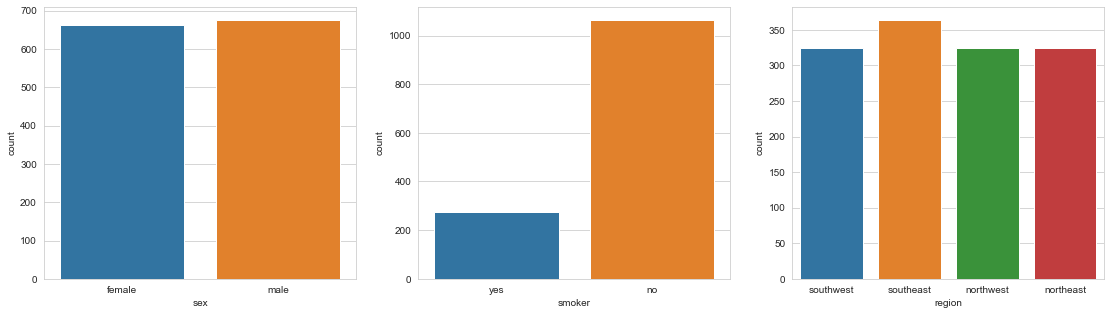

In [7]:
#Plot of categorical variables
cat = df.select_dtypes(exclude=np.number).columns.tolist()
plt.figure(figsize=(19,5))
for i,feature in enumerate(cat):
    plt.subplot(1,3,i+1)
    sns.countplot(df[feature])

<AxesSubplot:xlabel='age', ylabel='charges'>

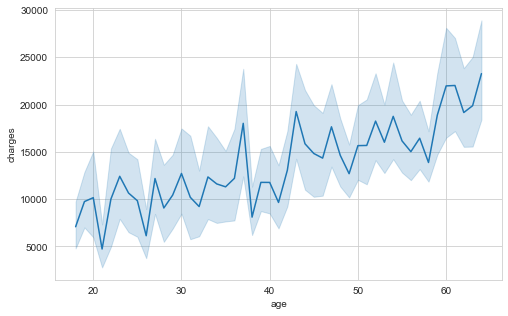

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(df['age'],df['charges'])

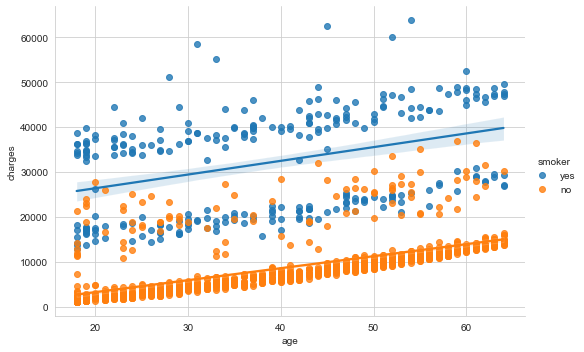

In [9]:
sns.lmplot('age','charges',data=df,hue='smoker',aspect=1.5)

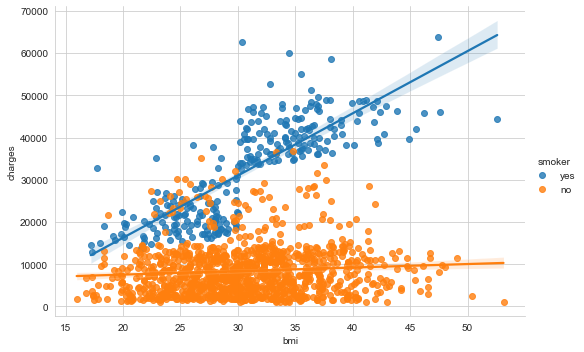

In [10]:
sns.lmplot('bmi','charges',data=df,hue='smoker',aspect=1.5)

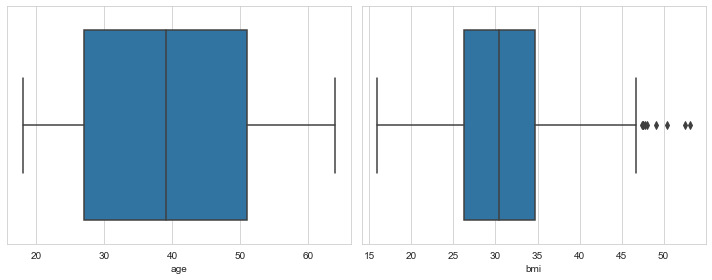

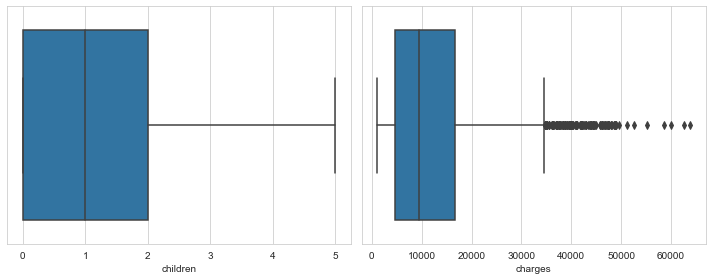

In [11]:
#taking a list of all the numerical features/columns
cols = df.select_dtypes(include=np.number).columns.tolist()
#Box plot of all the numerical features to identify outliers    
for col in range(0,len(cols),2):
    if len(cols) > col+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(df[cols[col]])
        plt.subplot(122)            
        sns.boxplot(df[cols[col+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(df[cols[col]])

##### From the box plot, we can see that there are some outliers in the bmi column. But there are many outliers in the charges column. We will deal with it below.

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Separating the dependent and independent features

X = df.drop("charges",1)  
y = df["charges"]

In [14]:
X = pd.get_dummies(data=X, drop_first=True)

## Model Building

### Linear Regression

In [15]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 8)
(295, 8)
(1043,)
(295,)


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(75.01147027649822, 74.48371642125801, 76.21912216949681)

In [18]:
y_predict = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 4503.002963355359
Root Mean Square Error= 6506.4537081705475


### OLS

In [20]:
import statsmodels.api as sm

In [21]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              885.2
Date:                Wed, 08 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:40:44   Log-Likelihood:                         -10594.
No. Observations:                1043   AIC:                                  2.120e+04
Df Residuals:                    1035   BIC:                                  2.124e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                212.1307     12.929     16.407      0.000     186.760     237.502
bmi                 56.8829     21.131      2.692      0.007      15.419      98.347
children           329.5878    163.125      2.020      0.044       9.494     649.681
sex_male          -355.3930    387.172     -0.918      0.359   -1115.125     404.339
smoker_yes        2.283e+04    487.466     46.835      0.000    2.19e+04    2.38e+04
region_northwest -1907.4756    536.290     -3.557      0.000   -2959.815    -855.136
region_southeast -1672.3553    564.507     -2.963      0.003   -2780.065    -564.646
region_southwest -2293.5964    557.938     -4.111      0.000   -3388.414   -1198.778
==============================================================================
Omnibus:                      232.294   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.740
Skew:                           1.200   Prob(JB):                    8.48e-119
Kurtosis:                       5.599   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From LR, we are getting the good scores in all cases.
##### From OLS, we can see that the feature called sex_male have high p-value. we can drop this column and run the model again.

In [22]:
X=X.drop("sex_male", axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 7)
(295, 7)
(1043,)
(295,)


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(75.01668801948071, 74.48239295333077, 76.2422093306884)

In [26]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1012.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:40:45   Log-Likelihood:                         -10594.
No. Observations:                1043   AIC:                                  2.120e+04
Df Residuals:                    1036   BIC:                                  2.124e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                211.6098     12.916     16.384      0.000     186.265     236.954
bmi                 52.5022     20.583      2.551      0.011      12.112      92.892
children           327.0395    163.089      2.005      0.045       7.017     647.062
smoker_yes        2.279e+04    485.454     46.946      0.000    2.18e+04    2.37e+04
region_northwest -1924.3332    535.935     -3.591      0.000   -2975.974    -872.692
region_southeast -1683.5307    564.333     -2.983      0.003   -2790.897    -576.164
region_southwest -2312.3111    557.523     -4.147      0.000   -3406.314   -1218.309
==============================================================================
Omnibus:                      232.237   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.760
Skew:                           1.200   Prob(JB):                    1.38e-118
Kurtosis:                       5.594   Cond. No.                         207.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(model_OLS.mse_resid) #Mean squared errors of the residuals
print(model_OLS.mse_total) #Total Mean Squared errors 

39175028.55086444
304895801.6267929


##### Now we can use some other regression modeling techniques like Decision Tree, Random Forest to see the score.

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
DTT=DecisionTreeRegressor()
DTT.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
DTT.score(X,y)*100,DTT.score(X_train,y_train)*100,DTT.score(X_test,y_test)*100

(93.73018735057632, 100.0, 76.59049445790777)

In [30]:
y_predict = DTT.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error=", mae)

Mean Absolute Error= 3144.529923454237


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y3_pred=rfr.predict(X_test)

In [34]:
mae=mean_absolute_error(y_test, y3_pred)
print("Mean Absolute Error=", mae)

Mean Absolute Error= 2777.980119766102


In [35]:
rfr.score(X,y)*100,rfr.score(X_train,y_train)*100,rfr.score(X_test,y_test)*100

(94.44523792396625, 97.60634666536257, 85.78171152874576)

##### From Decision Tree and Random Forest, We are getting high scores, but the difference is also high between the scores. We can't use these algorithms as there is linear relationship between the dependent and independent features. Linear regression will be good for these types of problems and also it would be more logical to use LR.

<AxesSubplot:xlabel='charges', ylabel='Density'>

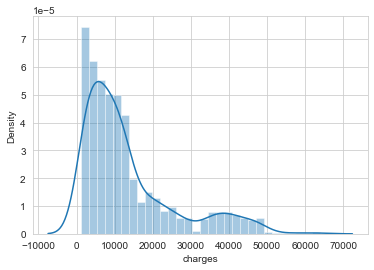

In [36]:
# Distribution of dependent variable
sns.distplot(df['charges'])

In [37]:
# The distribution is skewed to right. So will take the log of it.
df['charges'] = np.log(df['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

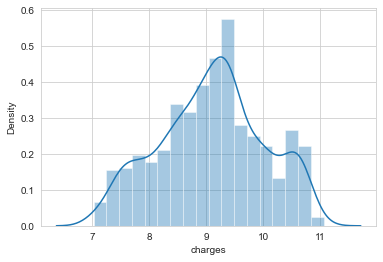

In [38]:
sns.distplot(df['charges'])

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [40]:
X = df.drop("charges",1)   #Feature Matrix
y = df["charges"]          #Target Variable

In [41]:
X = pd.get_dummies(data=X, drop_first=True)

In [42]:
# Running the model again.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 8)
(295, 8)
(1043,)
(295,)


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(76.73788011476061, 77.81499390298723, 73.30956322841764)

In [45]:
y_predict = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 0.3086805064260849
Root Mean Square Error= 0.49874089549076844


In [47]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              7037.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:40:46   Log-Likelihood:                         -1693.0
No. Observations:                1043   AIC:                                      3402.
Df Residuals:                    1035   BIC:                                      3442.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0684      0.003     26.876      0.000       0.063       0.073
bmi                  0.1691      0.004     40.683      0.000       0.161       0.177
children             0.2317      0.032      7.220      0.000       0.169       0.295
sex_male             0.1745      0.076      2.291      0.022       0.025       0.324
smoker_yes           1.8922      0.096     19.731      0.000       1.704       2.080
region_northwest     0.7770      0.106      7.364      0.000       0.570       0.984
region_southeast     0.0482      0.111      0.434      0.664      -0.170       0.266
region_southwest     0.4862      0.110      4.430      0.000       0.271       0.702
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.153
Skew:                           0.011   Prob(JB):                        0.926
Kurtosis:                       2.945   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
print(model_OLS.mse_resid) #Mean squared errors of the residuals
print(model_OLS.mse_total) #Total Mean Squared errors 

1.5163064279328486
83.34766999813397


In [49]:
# region_southeast has high p-value. So dropping this feature.
X=X.drop('region_southeast',1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 7)
(295, 7)
(1043,)
(295,)


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(76.37911899123696, 77.46963135142002, 72.90791706930304)

In [53]:
y_predict = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 0.3126942490109099
Root Mean Square Error= 0.5024794887267481


In [55]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              8049.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:40:46   Log-Likelihood:                         -1693.1
No. Observations:                1043   AIC:                                      3400.
Df Residuals:                    1036   BIC:                                      3435.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0683      0.003     26.898      0.000       0.063       0.073
bmi                  0.1700      0.004     46.237      0.000       0.163       0.177
children             0.2318      0.032      7.227      0.000       0.169       0.295
sex_male             0.1752      0.076      2.302      0.022       0.026       0.325
smoker_yes           1.8957      0.096     19.846      0.000       1.708       2.083
region_northwest     0.7535      0.091      8.325      0.000       0.576       0.931
region_southwest     0.4617      0.094      4.914      0.000       0.277       0.646
==============================================================================
Omnibus:                        0.090   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.154
Skew:                           0.006   Prob(JB):                        0.926
Kurtosis:                       2.942   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### After dropping the region_southeast feature, there is not much change in the results set, but since it's p-value is high, so it would be good to drop it.